Group Assignment #2: Census Data Exploration
For this group assignment, each group member will create and submit a separate Jupyter Notebook. Each notebook should choose census indicators that are relevant to your research project. For example:

one group member may choose to do a race profile for Los Angeles, and the other member may choose to do the same race profile for New York
one member may choose to do a transportation profile for Los Angeles, and the other member may choose an education profile also for Los Angeles
each member may choose a different time period to do a temporal analysis.
Do not copy and paste the class lab. Make sure to start a brand new notebook.

If you are working on a project outside of the United States, consult with me to find an alternative dataset to explore.

- The first cell of the notebook should be a markdown cell that includes a title, description, and author of the assignment.
- Download census variables relevant to your research question (if you are working outside of the United States, consult with me to find an alternative dataset)
- Create a Jupyter Notebook and use pandas/geopandas to explore and visualize the data
- Produce several charts, including one or more maps
- Make sure to document each procedure with markdown cells with relevant headers
- Run the cells in the notebook, and make sure the notebook "reads" from top to bottom, telling a story
- Upload each Jupyter Notebook along with the associated census data file to your group repo

# Census Data Exploration for Bel Air and Century City.

**Description:** This document contains an exploration of census data in Bel Air and Century City, which are generally perceived as high-income neighborhoods. My partner, Henry, will be examining the opposite side of the spectrum. By examining the Median Household Income of these cities, we can better understand the economic context of the community. This will ultimately help us analyze the relationship between wealth (or lack thereof) to consumerism, which has a big influence on the activity of businesses in an area.  

https://geohub.lacity.org/datasets/57e9231c3bd34d44ae49b309b0cb440e_1?selectedAttribute=HH_Incom_2

**Author:** Derek Wang

# Preparing the data

## Importing necessary data libraries

In [1]:
# for data wrangling 
import pandas as pd

# for reading and visualizing spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Loading the data and inspecting it



Here, we use **gpd.read_file()** to read in the geojson file that was sourced from the City of LA public dataset. **shape**, **info()**, and **head()** were used to get a glance at the size, columns, and general overview of the data set, respectively.

In [2]:
# load a data file
la_index = gpd.read_file('data/Los_Angeles_Index_of_Neighborhood_Change.geojson')

In [3]:
la_index.shape

(155, 30)

In [4]:
la_index.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   FID           155 non-null    int64   
 1   zipcode       155 non-null    object  
 2   Rank          155 non-null    int64   
 3   Neighborho    155 non-null    object  
 4   IRS_Ratio     155 non-null    float64 
 5   HH_Size       155 non-null    float64 
 6   Per_White     155 non-null    float64 
 7   Per_Colleg    155 non-null    float64 
 8   Rent          155 non-null    float64 
 9   Index_Scor    155 non-null    float64 
 10  IRS_Rati_1    155 non-null    float64 
 11  IRS_Rati_2    155 non-null    float64 
 12  HH_Incom_2    155 non-null    int64   
 13  HH_Size_20    155 non-null    float64 
 14  HH_Size_21    155 non-null    float64 
 15  Percent_Wh    155 non-null    float64 
 16  Percent__1    155 non-null    float64 
 17  College_Pe    155 non-null    float64 
 18  Co

In [5]:
la_index.head()

,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,...,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry
0,1,90001,37,Florence,-47.007,-2.759,-0.086,1.561,24.858,0.389561,...,975,33279.05739,2.316600,54481,56314,3.4,Yes,0.087079,0.000235,"MULTIPOLYGON (((-118.25632 33.98869, -118.2563..."
1,2,90002,57,Watts/Green Meadows,-44.965,1.683,0.346,1.309,25.733,0.359525,...,968,31443.73944,-3.910920,44584,50098,12.4,Yes,0.155066,0.000517,"MULTIPOLYGON (((-118.25592 33.96004, -118.2559..."
2,3,90003,33,Florence/Broadway-Manchester,-41.524,3.000,-0.182,2.798,35.303,0.402008,...,1064,30720.61042,-2.293608,58187,66913,15.0,Yes,0.186812,0.000930,"MULTIPOLYGON (((-118.27394 33.98974, -118.2739..."
3,4,90004,15,East Hollywood/Larchmont/Windsor Square,-32.379,-6.873,3.060,11.296,29.716,0.483000,...,1070,37931.27907,1.480891,67850,63547,-6.3,Yes,0.163615,0.000762,"MULTIPOLYGON (((-118.30914 34.08353, -118.3089..."
4,5,90005,20,Koreatown/Mid-Wilshire,-41.123,-8.214,0.934,7.120,24.864,0.460000,...,939,30242.19046,3.213423,43014,38638,-10.2,Yes,0.279436,0.000335,"MULTIPOLYGON (((-118.33541 34.06179, -118.3350..."


## Next, we need to subset only necessary data (Bel Air and Century City), and plot it to get a better perspective.

In [6]:
bel_air = la_index[la_index.zipcode == "90077"]
century_city = la_index[la_index.zipcode == "90067"]

In [7]:
bel_air

,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,...,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry
57,58,90077,111,Bel Air,21.945,2.429,-1.88,3.738,-3.531,0.140502,...,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831,"MULTIPOLYGON (((-118.45547 34.13449, -118.4555..."


In [8]:
century_city

,FID,zipcode,Rank,Neighborho,IRS_Ratio,HH_Size,Per_White,Per_Colleg,Rent,Index_Scor,...,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area,geometry
54,55,90067,107,Century City,7.871,1.258,-4.565,13.367,-9.361,0.218463,...,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091,"MULTIPOLYGON (((-118.41423 34.06415, -118.4140..."


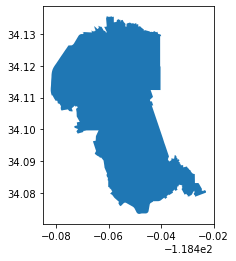

In [9]:
bel_air.plot()

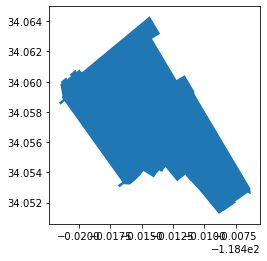

In [10]:
century_city.plot()

# Importing the second dataset with preliminary inspection

In [14]:
bg = gpd.read_file('data/acs2019_5yr_B19013_15000US060372318003.geojson')
#bg = block group


We use **gpd.read_file()** to read in the other geojson file that was sourced from Census Reporter. This particular dataset reveals block groups of the LA that are filtered by Median Household Income.  **shape**, **info()**, and **head()** were used to get a glance at the size, columns, and general overview of the data set, respectively. Lastly, we use **plot()** to get a general view of the area we are covering. 

In [15]:
bg.shape

(2516, 5)

In [16]:
bg.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2516 non-null   object  
 1   name              2516 non-null   object  
 2   B19013001         2432 non-null   float64 
 3   B19013001, Error  2416 non-null   float64 
 4   geometry          2516 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 98.4+ KB


In [17]:
bg.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",74125.0,30142.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",41625.0,21278.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",74886.0,35271.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",90611.0,11492.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",79868.0,44357.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."


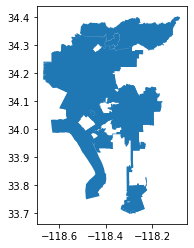

In [18]:
bg.plot()

## Trim the data

We trim the dataset to only contain columns that are of interest: *geoid*, *name*, *B19013001* (the Median household Income), and *geometry*. We update the original dataset and **copy()**. 

In [23]:
columns = ["geoid", "name", "B19013001", "geometry"]
bg[columns]

In [27]:
#create new dataset with the copy and apply the subsetting so that original is untouched
new_bg = bg.copy()
new_bg = new_bg[columns]
new_bg

,geoid,name,B19013001,geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",74125.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",41625.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",74886.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
3,15000US060371011221,"Block Group 1, Los Angeles, CA",90611.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",79868.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."
...,...,...,...,...
2511,15000US060379800261,"Block Group 1, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.35173 34.28034, -118.3517..."
2512,15000US060379800281,"Block Group 1, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
2513,15000US060379800311,"Block Group 1, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2514,15000US060379902000,"Block Group 0, Los Angeles, CA",NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


## Rename Column Headers

The name "B19013001" does not carry any meaning, so we will rename it to "MHI", where MHI means Median Household Income, to improve clarity.

In [30]:
bg.rename(columns={'B19013001': 'MHI'}, inplace = True)

## Query the Dataset and Plot it
We query the dataframe by filtering Block Groups that have a MHI of greater than 80,000. This number is arbitrarily defined as high income, and may change after further research. This new subset is assigned to a new variable, we can consequently generate a map to reflect this subsetting. 

In [45]:
 bg[bg['MHI'] < 80000.0]

,geoid,name,MHI,geometry
0,15000US060371011101,"Block Group 1, Los Angeles, CA",74125.0,"MULTIPOLYGON (((-118.29133 34.26008, -118.2913..."
1,15000US060371011102,"Block Group 2, Los Angeles, CA",41625.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,15000US060371011103,"Block Group 3, Los Angeles, CA",74886.0,"MULTIPOLYGON (((-118.30080 34.26327, -118.2979..."
4,15000US060371011222,"Block Group 2, Los Angeles, CA",79868.0,"MULTIPOLYGON (((-118.29075 34.26906, -118.2906..."
5,15000US060371012101,"Block Group 1, Los Angeles, CA",31758.0,"MULTIPOLYGON (((-118.29434 34.25233, -118.2931..."
...,...,...,...,...
2496,15000US060372976023,"Block Group 3, Los Angeles, CA",74833.0,"MULTIPOLYGON (((-118.29285 33.71970, -118.2916..."
2497,15000US060377011001,"Block Group 1, Los Angeles, CA",45536.0,"MULTIPOLYGON (((-118.46889 34.06587, -118.4687..."
2502,15000US060379800101,"Block Group 1, Los Angeles, CA",19167.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."
2504,15000US060379800151,"Block Group 1, Los Angeles, CA",66000.0,"MULTIPOLYGON (((-118.31048 33.76685, -118.3102..."


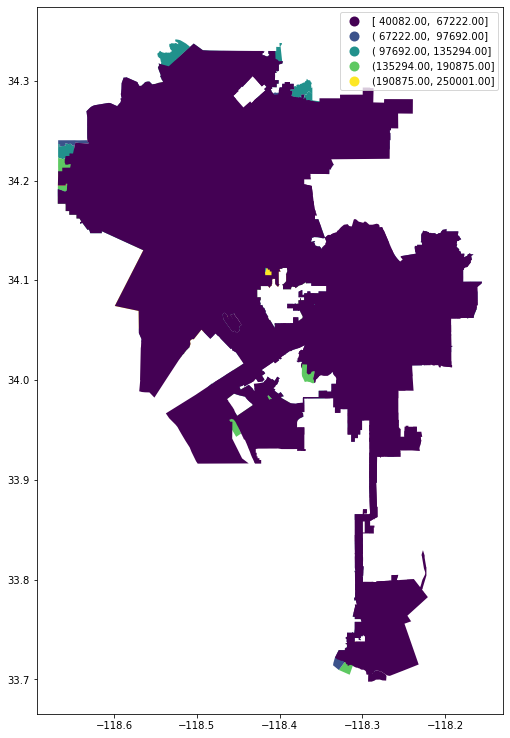

In [46]:
high_income = bg[bg['MHI'] > 40000.0] #high income block groups under $40k
high_income.plot(figsize=(15,13), column='MHI', legend=True, scheme='NaturalBreaks')

## Spatial Join and Preliminary Inspection of Bel Air
I spatial join the *low income* and *ktown dataframes* using *sjoin()*. This merges the geometry objects based on their spatial relationship to one another and outputs a subset where the low income block groups touch Koreatown. To prove that its a new geodataframe, I use head to look at the size of the dataframe.

In [47]:
bel_air_bg = gpd.sjoin(high_income, bel_air, how="inner", op="intersects")
type(bel_air_bg)

geopandas.geodataframe.GeoDataFrame

In [44]:
bel_air_bg.head()

,geoid,name,MHI,geometry,index_right,FID,zipcode,Rank,Neighborho,IRS_Ratio,...,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area
811,15000US060371416001,"Block Group 1, Los Angeles, CA",141875.0,"MULTIPOLYGON (((-118.46481 34.14062, -118.4648...",57,58,90077,111,Bel Air,21.945,...,2073,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831
813,15000US060371416003,"Block Group 3, Los Angeles, CA",216389.0,"MULTIPOLYGON (((-118.47497 34.12692, -118.4747...",57,58,90077,111,Bel Air,21.945,...,2073,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831
815,15000US060371417002,"Block Group 2, Los Angeles, CA",216359.0,"MULTIPOLYGON (((-118.44735 34.13439, -118.4473...",57,58,90077,111,Bel Air,21.945,...,2073,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831
816,15000US060371417003,"Block Group 3, Los Angeles, CA",250001.0,"MULTIPOLYGON (((-118.45323 34.13547, -118.4532...",57,58,90077,111,Bel Air,21.945,...,2073,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831
2062,15000US060372612001,"Block Group 1, Los Angeles, CA",188393.0,"MULTIPOLYGON (((-118.45944 34.13048, -118.4592...",57,58,90077,111,Bel Air,21.945,...,2073,2000,194567.07379,-11.370924,10465,8328,-20.4,Yes,0.26866,0.001831


## Generating Simple Statistics and Plot

I use describe() to get a statistical breakdown of the ‘MHI’ column of the bel_air_bg dataframe. I then generate a histogram to contextualize the statistical information. Additionaly, I generate a map of Bel_Air that are distinguihsed by different income levels.

count        14.000000
mean     189389.928571
std       52647.712319
min       62142.000000
25%      162223.250000
50%      194804.000000
75%      216381.500000
max      250001.000000
Name: MHI, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


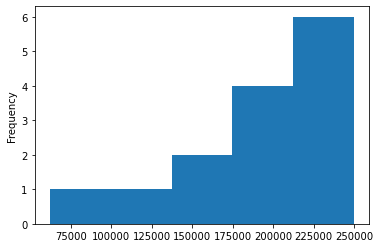

In [52]:
print(bel_air_bg["MHI"].describe()) 
print(bel_air_bg["MHI"].plot.hist(bins=5))

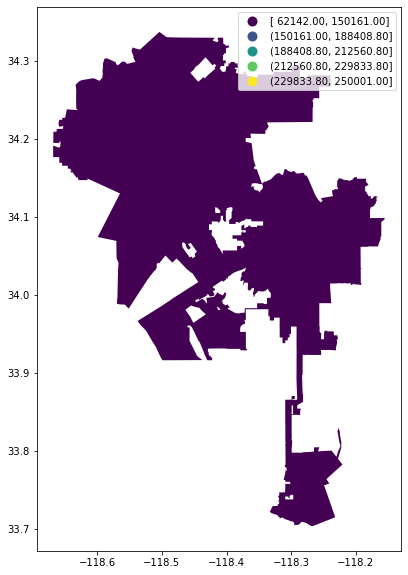

In [53]:
bel_air_bg.plot(figsize=(12,10),
              column='MHI',
              legend=True, 
              scheme='quantiles')

## Adding a Base Map 
I reproject the geodataframe to Web Mercator and generate a multi-layered map of Bel Air.

In [64]:
bel_air_bg_web_mercator = bel_air_bg.to_crs(epsg=3857)

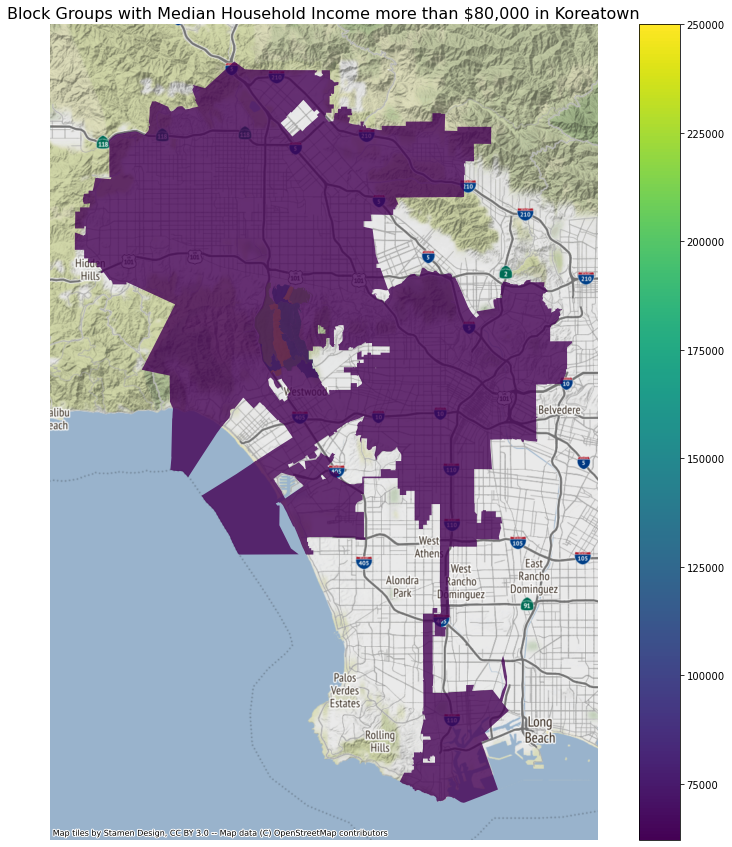

In [75]:
fig, ax = plt.subplots(figsize=(15, 15))
bel_air_bg_web_mercator[bel_air_bg_web_mercator['MHI']>0].plot(ax=ax, alpha=0.8, legend= True, column= "MHI")
ax.axis('off')
ax.set_title('Block Groups with Median Household Income more than $80,000 in Koreatown',fontsize=16) 
ctx.add_basemap(ax)

## Spatial Join and Preliminary Inspection of Downtown

I spatial join the high income and bel_air dataframes using sjoin(). This merges the geometry objects based on their spatial relationship to one another and outputs a subset where the low income block groups touch Century City.

In [66]:
century_city_bg = gpd.sjoin(high_income, century_city, how="inner", op="intersects")
century_city_bg.head()

,geoid,name,MHI,geometry,index_right,FID,zipcode,Rank,Neighborho,IRS_Ratio,...,Gross_Rent,Gross_Re_1,MedInc4,HHChangAdj,Population,Populati_1,Populati_2,Evaluated,SHAPE_Length,SHAPE_Area
2131,15000US060372657002,"Block Group 2, Los Angeles, CA",103250.0,"MULTIPOLYGON (((-118.42878 34.05900, -118.4274...",54,55,90067,107,Century City,7.871,...,2207,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091
2134,15000US060372671002,"Block Group 2, Los Angeles, CA",132500.0,"MULTIPOLYGON (((-118.42418 34.05756, -118.4228...",54,55,90067,107,Century City,7.871,...,2207,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091
2160,15000US060372679011,"Block Group 1, Los Angeles, CA",164000.0,"MULTIPOLYGON (((-118.42142 34.05946, -118.4205...",54,55,90067,107,Century City,7.871,...,2207,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091
2161,15000US060372679012,"Block Group 2, Los Angeles, CA",105184.0,"MULTIPOLYGON (((-118.41176 34.05851, -118.4107...",54,55,90067,107,Century City,7.871,...,2207,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091
2164,15000US060372679023,"Block Group 3, Los Angeles, CA",124866.0,"MULTIPOLYGON (((-118.41845 34.05163, -118.4183...",54,55,90067,107,Century City,7.871,...,2207,2000,102874.0391,-13.000402,2524,2364,-6.3,Yes,0.048369,0.000091


## Simple Statistics and Plots
I use describe() to get a statistical breakdown of the ‘MHI’ column of the century_city_bg dataframe. I then generate a histogram to contextualize the statistical information. Additionaly, I generate a map of Century City that are distinguished by different income levels.

count         6.000000
mean     115323.666667
std       34153.605711
min       62142.000000
25%      103733.500000
50%      115025.000000
75%      130591.500000
max      164000.000000
Name: MHI, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)


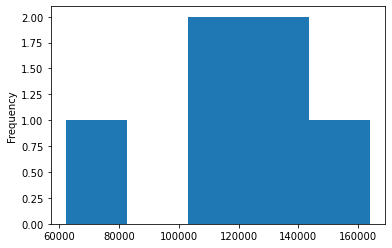

In [70]:
print(century_city_bg["MHI"].describe())
print(century_city_bg["MHI"].plot.hist(bins=5))

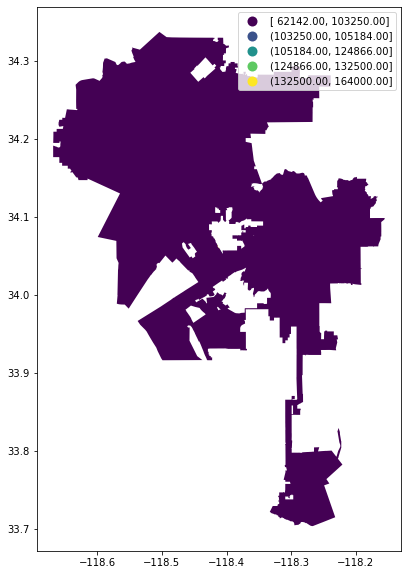

In [71]:
century_city_bg.plot(figsize=(12,10), column='MHI', legend=True, scheme='quantiles')

## Adding a Base Map

We reproject the geodataframe to Web Mercator and generate a multi-layered map of Century City.

In [72]:
century_city_bg_web_mercator = century_city_bg.to_crs(epsg=3857)

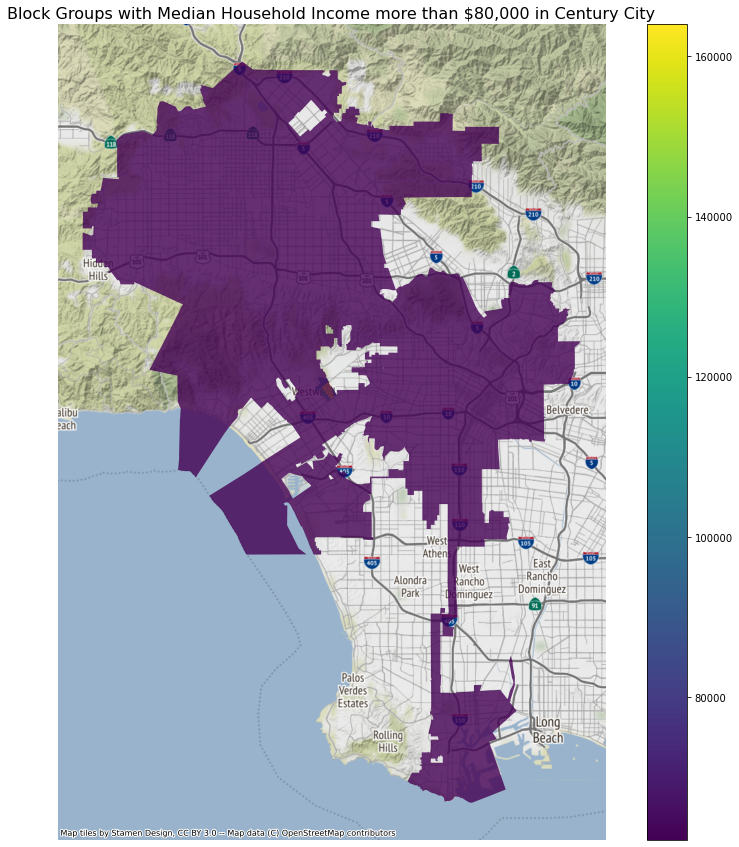

In [76]:
fig, ax = plt.subplots(figsize=(15, 15)) 
century_city_bg_web_mercator[century_city_bg_web_mercator['MHI']>0].plot(ax=ax, alpha=0.8, legend= True, column= "MHI")
ax.axis('off')
ax.set_title('Block Groups with Median Household Income more than $80,000 in Century City', fontsize=16) 
ctx.add_basemap(ax)